<a href="https://colab.research.google.com/github/shuvuu/mongolian-speech-recognition/blob/master/MongolianSpeech2Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mongolian speech recognition demo using [tugstugi/mongolian-speech-recognition](https://github.com/tugstugi/mongolian-speech-recognition).

## Install

Clone the project and install the dependencies:

In [0]:
import os
import time
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/tugstugi/mongolian-speech-recognition.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  !git clone -q {git_repo_url}
  !cd {project_name} && git checkout 8369c96
  !cd {project_name} && pip install -q -r requirements.txt
  !pip install youtube-dl wget
  
from IPython.display import YouTubeVideo

Note: checking out '8369c96'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 8369c96 support for ctc decode in eval.py
    100% |████████████████████████████████| 133kB 20.7MB/s 
    100% |████████████████████████████████| 51kB 23.7MB/s 
    100% |████████████████████████████████| 1.8MB 1.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


For the language model support, we need also the `ctcdecode` lib:

In [0]:
if not exists('ctcdecode'):
  !git clone -q --recursive https://github.com/parlance/ctcdecode.git
  !cd ctcdecode && pip install .

Processing /content/ctcdecode
  Stored in directory: /tmp/pip-ephem-wheel-cache-ufebmnt5/wheels/c3/6c/94/7d57d4f20a87a22ef1722eaad22052b4c435892b55400e5f4e
Successfully built ctcdecode


## Download Model

Downlad the pre-trained model:

In [0]:
logdir = join(project_name, 'logdir', 'mbspeech')
checkpoint = 'checkpoint.pth'
if not exists(logdir):
  !mkdir -p {logdir}
  !wget -q -O {logdir}/{checkpoint} https://www.dropbox.com/s/5ptvxo5fm9uh7bh/epoch-0055-8369c96.pth

Download the 5-gram binary language model:

In [0]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}

lm_model = 'mn_5gram.binary'
if not exists(lm_model):
  download_from_google_drive('1XsNNdLDpJ75GBpw1FAUqZXyqwsb4919x', lm_model)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1371      0 --:--:-- --:--:-- --:--:--  1371
100 1816M    0 1816M    0     0  45.1M      0 --:--:--  0:00:40 --:--:-- 67.1M


## Test on YouTube Video

Test on some random Mongolian youtube video:

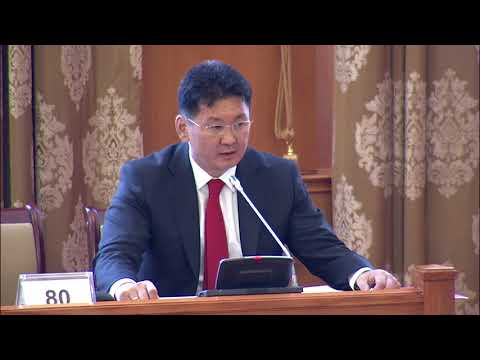

In [0]:
YOUTUBE_ID = 'nniXeQwBKzw'


YouTubeVideo(YOUTUBE_ID)

In [0]:
ALPHA = 0.3  # How much do you trust for LM? 0 means don't use LM, bigger values more trust in LM
BETA = 1.85  # not so important, using DeepSpeech default one

!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!python {project_name}/eval.py --checkpoint={logdir}/{checkpoint} --lm={lm_model} --alpha {ALPHA} --beta {BETA} test.wav

[youtube] nniXeQwBKzw: Downloading webpage
[youtube] nniXeQwBKzw: Downloading video info webpage
[youtube] nniXeQwBKzw: Downloading MPD manifest
[dashsegments] Total fragments: 41
[download] Destination: test.m4a
[download] 100% of 3.01MiB in 00:08
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
use_gpu: True
loaded checkpoint epoch=56 step=18760
inference time: 0.044s
decode time: 38.423s
Predicted:
ийм ярьчихлаа би чинь одоо хяналтын горимоор одоо бид чинь сөрөг хүч байна шүү дээ яамдын тоо их байна аа энийг багасахыг яриад байхад яамдын тоог нэмвэл таныг багаар нь дэмжинэ гээд яриад байгаа юм тэгэхээр та энэтээ санал нэг байгаа юм яамдын тоо бий бол одоо байгаа тооноос нь багасыг тани чи одоо ардын засгийн ерөнхий сайд гээд эрх коландаа ба ардын засгийн үе таван яам байсан юм одоо ард түмний схийн газарын үед нэг арванд байвал болоо н гишүүн хэвлэ гэдэг нь болж байна зурхантай жил болж магадгүй тийм учраас 